In [1]:
#1) Import libraries
import random
import numpy as np 
import math
import matplotlib.pyplot as plt

In [2]:
#2) Function CG
v_p=1.0 #pedestrian speed
len_cross=5.0 #crosswalk length
gamma=math.log10(len_cross/v_p) 

def CG_score_opti(genre,age):
    """
        Compute CG of one pedestrian
        :param genre: gender of the pesdestrian
        :param age: age of the pesdestrian
        :return: Critical Gap 
    """
    fem, child, midage, old, alpha, sigma = 0.0369, -0.0355, -0.0221, -0.1810, 0.09, 0.09
    gamma = math.log10(len_cross/v_p)
    log_val = alpha+gamma+fem*(genre == 1)+child*(age == 0)+midage*(age == 1)+old*(age == 2)
    log_val = log_val + np.random.normal(loc=0.0, scale=sigma)
    return math.pow(10, log_val)
CG_childmen_opti=[CG_score_opti(0,0) for i in range(0,10000)]
CG_midagemen_opti=[CG_score_opti(0,1) for i in range(0,10000)]
CG_oldmen_opti=[CG_score_opti(0,2) for i in range(0,10000)]

In [3]:
nb_hist=50
n, bin_edges,_=plt.hist([CG_midagemen_opti,CG_oldmen_opti], nb_hist)
plt.clf()
proba_old = n[1]/float(n[1].sum())
proba_young = n[0]/float(n[0].sum())

<Figure size 432x288 with 0 Axes>

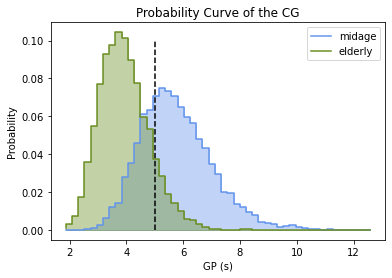

In [4]:
#3) Plot
plt.title("Probability Curve of the CG")
plt.ylabel("Probability")
plt.xlabel("GP (s)")
plt.step(bin_edges[0:nb_hist],proba_young,color="cornflowerblue", label='midage')
plt.step(bin_edges[0:nb_hist],proba_old,color="olivedrab", label='elderly')
plt.fill_between(bin_edges[0:nb_hist], proba_young, color='cornflowerblue', step="pre", alpha=0.4)
plt.fill_between(bin_edges[0:nb_hist], proba_old,color="olivedrab", step="pre", alpha=0.4)
plt.vlines(len_cross/v_p,0,0.1, color="black",linestyles = "dashed")
plt.legend(prop={'size': 10})
plt.savefig('PDF_results/proba-older-50bins.pdf')